<a href="https://colab.research.google.com/github/NenaVuksic/Csharp-Data-Visualization/blob/master/SU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras import preprocessing
from keras import regularizers
import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import math

In [ ]:
path = "/content/raw_sales.csv"
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv(path, parse_dates=['datesold'], date_parser=dateparse)
data = data.sort_values(by=['datesold'])

# Eksploatorna analiza

In [ ]:
data.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

<Axes: >

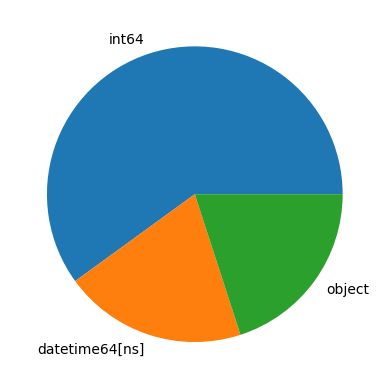

In [ ]:
data.dtypes.value_counts().plot.pie()

In [ ]:
data.head

<bound method NDFrame.head of         datesold  postcode   price propertyType  bedrooms
0     2007-02-07      2607  525000        house         4
1     2007-02-27      2906  290000        house         3
2     2007-03-07      2905  328000        house         3
3     2007-03-09      2905  380000        house         4
4     2007-03-21      2906  310000        house         3
...          ...       ...     ...          ...       ...
24548 2019-07-26      2902  657500        house         4
29578 2019-07-26      2601  589000         unit         2
24549 2019-07-27      2905  610000        house         4
24550 2019-07-27      2615  647500        house         4
24551 2019-07-27      2905  865000        house         5

[29580 rows x 5 columns]>

In [ ]:
data.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [ ]:
data.info

<bound method DataFrame.info of         datesold  postcode   price propertyType  bedrooms
0     2007-02-07      2607  525000        house         4
1     2007-02-27      2906  290000        house         3
2     2007-03-07      2905  328000        house         3
3     2007-03-09      2905  380000        house         4
4     2007-03-21      2906  310000        house         3
...          ...       ...     ...          ...       ...
24548 2019-07-26      2902  657500        house         4
29578 2019-07-26      2601  589000         unit         2
24549 2019-07-27      2905  610000        house         4
24550 2019-07-27      2615  647500        house         4
24551 2019-07-27      2905  865000        house         5

[29580 rows x 5 columns]>

<Axes: xlabel='postcode', ylabel='price'>

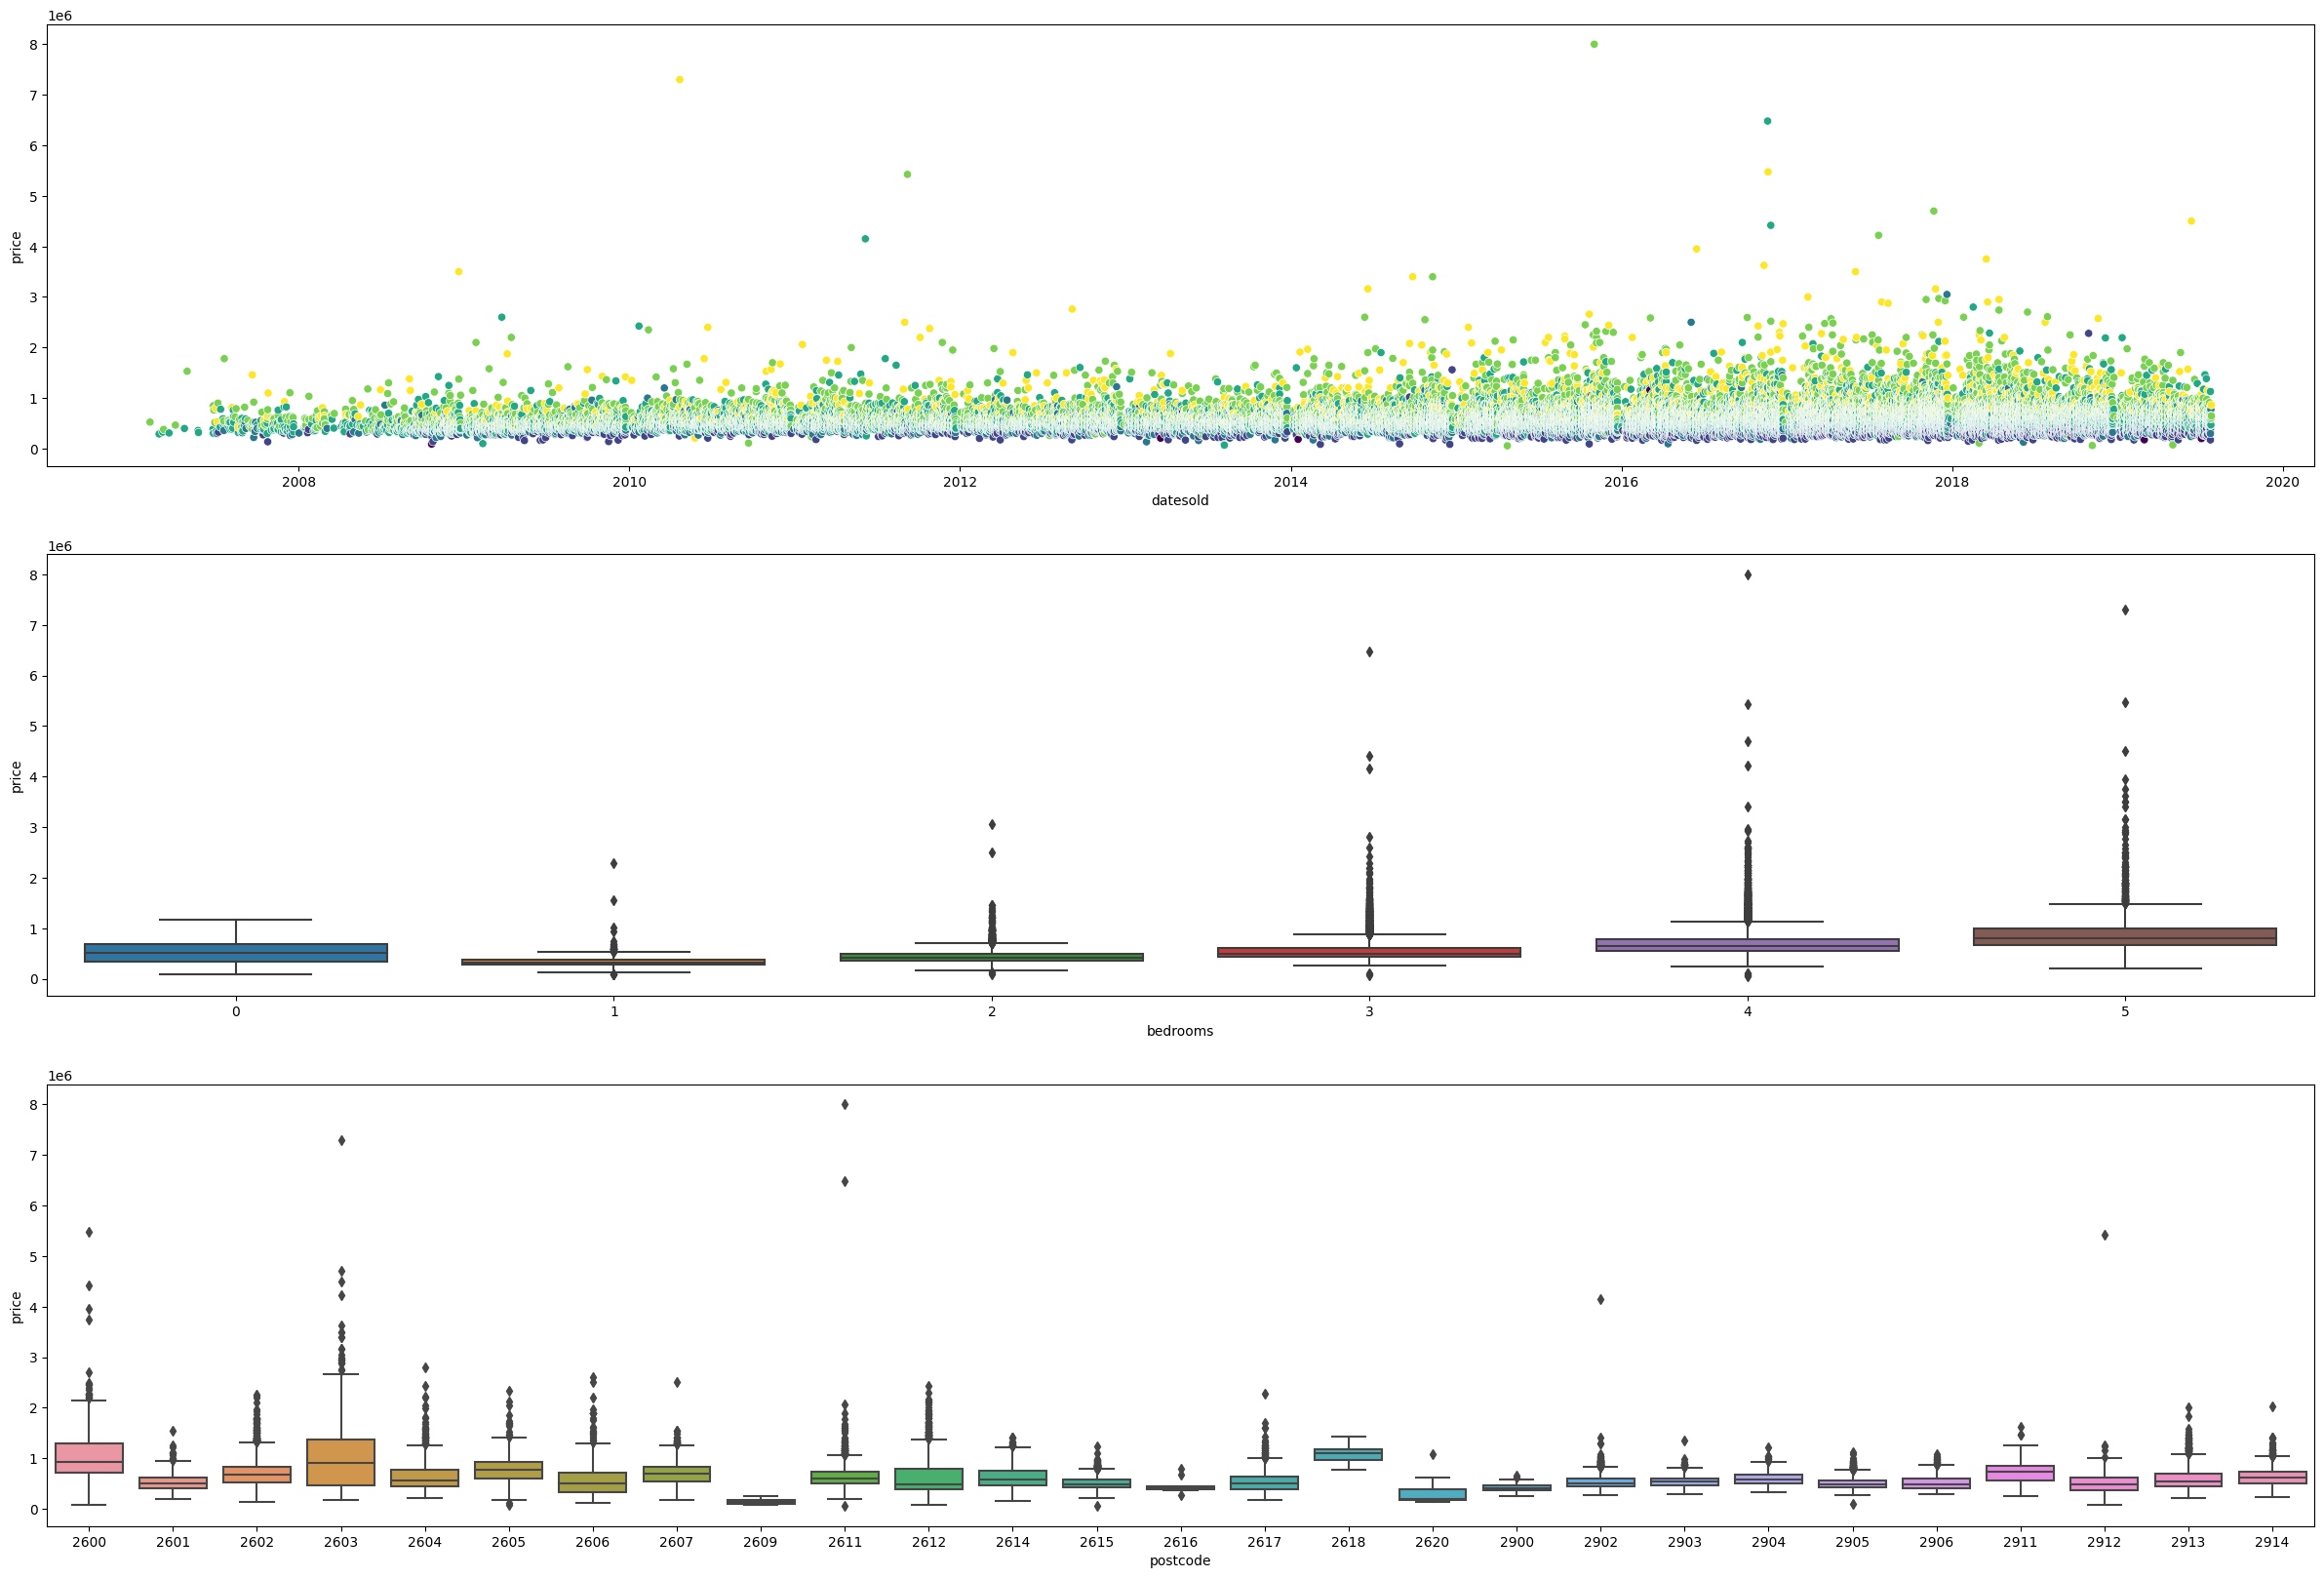

In [ ]:
fig = plt.figure(figsize=(30,20))
plt.subplot(311)
sns.scatterplot(data=data, x='datesold', y='price', c = data["bedrooms"])
plt.subplot(312)
sns.boxplot(data=data, x='bedrooms', y="price")
plt.subplot(313)
sns.boxplot(data=data, x='postcode', y="price")

In [ ]:
data = data.drop(data[data['price'] > 3500000].index)

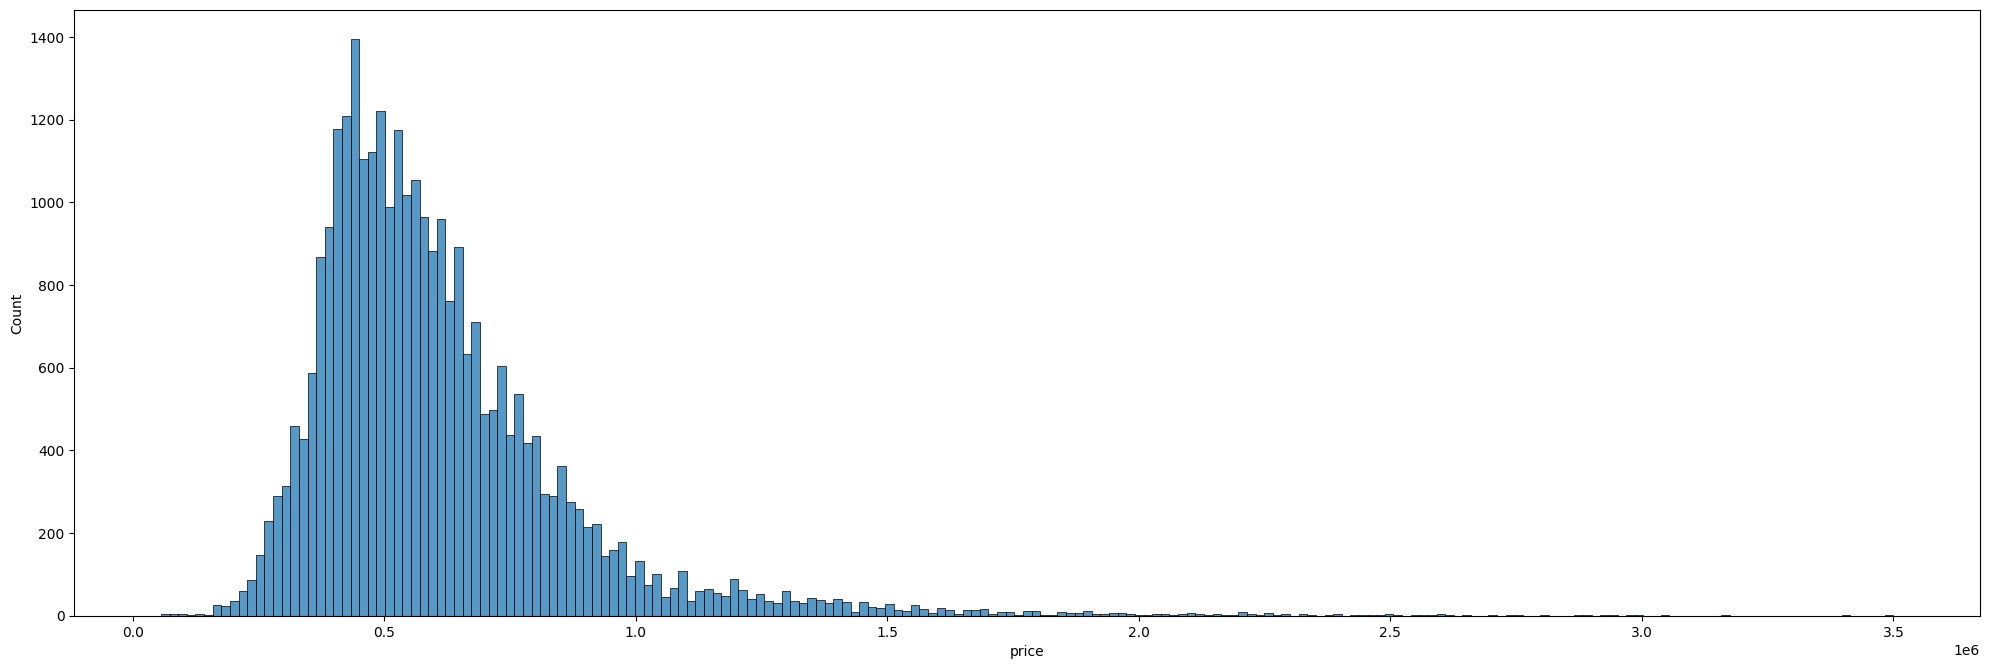

In [ ]:
fig = plt.figure(figsize=(20,13))
fig.add_subplot(2,1,1)
sns.histplot(data['price'])
plt.tight_layout()

In [ ]:
cities = data["postcode"].value_counts()
label = cities.index
counts = cities.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Houses per postal code')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()

In [ ]:
set(data["propertyType"] )

{'house', 'unit'}

In [ ]:
set(data["postcode"] )

{2600,
 2601,
 2602,
 2603,
 2604,
 2605,
 2606,
 2607,
 2609,
 2611,
 2612,
 2614,
 2615,
 2616,
 2617,
 2618,
 2620,
 2900,
 2902,
 2903,
 2904,
 2905,
 2906,
 2911,
 2912,
 2913,
 2914}

In [ ]:
data.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [ ]:
data["propertyType"] = data["propertyType"].map({"house": 1, "unit": 2})

In [ ]:
data['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
24548   2019-07-26
29578   2019-07-26
24549   2019-07-27
24550   2019-07-27
24551   2019-07-27
Name: datesold, Length: 29567, dtype: datetime64[ns]

In [ ]:
data['year']= data['datesold'].dt.year
data['month']= data['datesold'].dt.month

<Axes: xlabel='year', ylabel='price'>

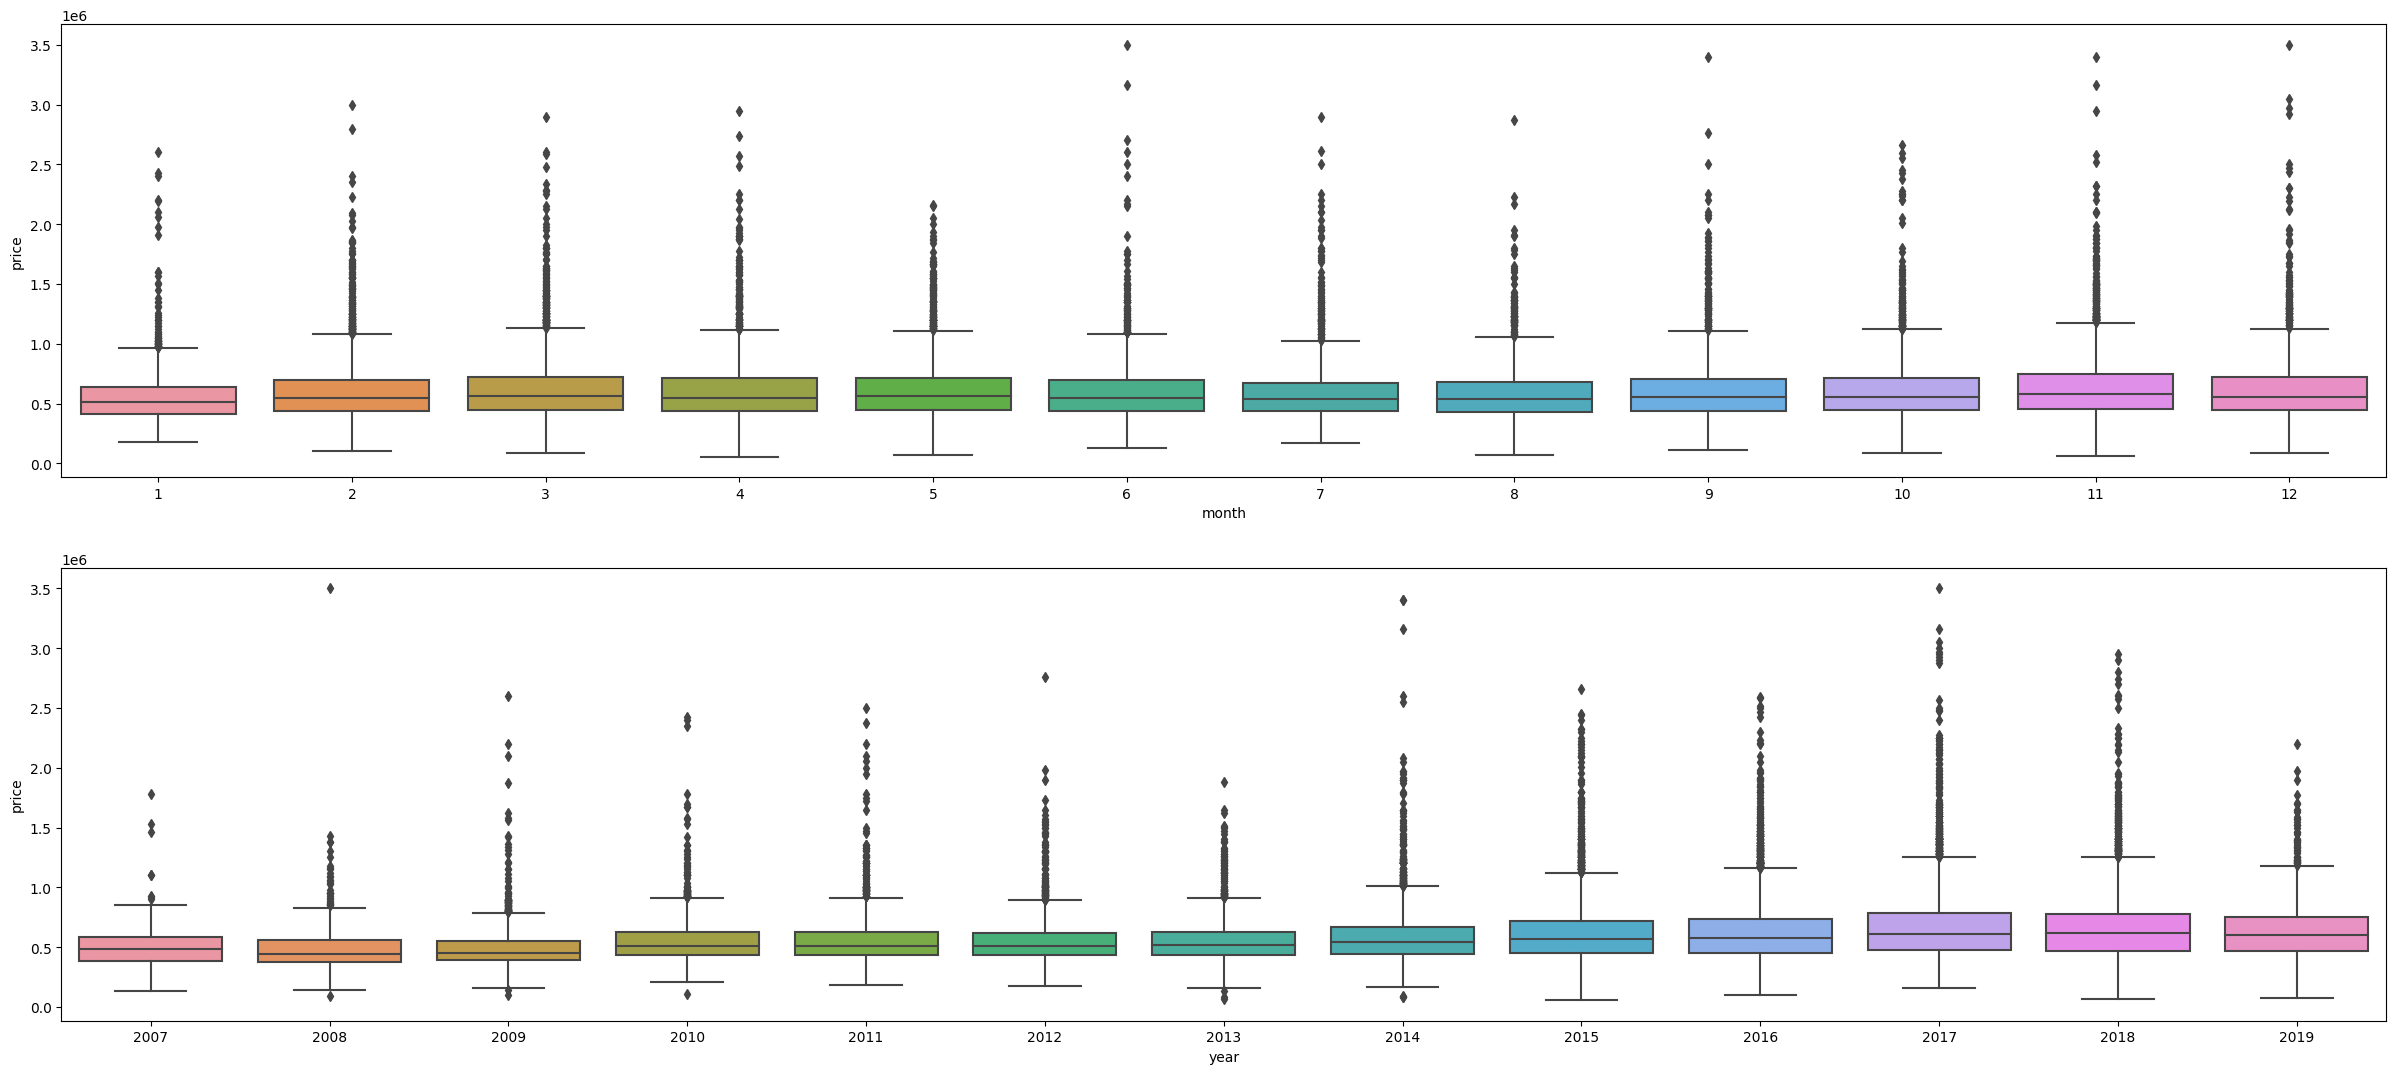

In [ ]:
fig = plt.figure(figsize=(30,20))
plt.subplot(311)
sns.boxplot(data=data, x='month', y='price')
plt.subplot(312)
sns.boxplot(data=data, x='year', y='price')

In [ ]:
data["datesold"] =pd.to_datetime(data["datesold"])
data["datesold"] = data['datesold'].apply(lambda x:x.toordinal())

In [ ]:
data

,datesold,postcode,price,propertyType,bedrooms,year,month
0,732714,2607,525000,1,4,2007,2
1,732734,2906,290000,1,3,2007,2
2,732742,2905,328000,1,3,2007,3
3,732744,2905,380000,1,4,2007,3
4,732756,2906,310000,1,3,2007,3
...,...,...,...,...,...,...,...
24548,737266,2902,657500,1,4,2019,7
29578,737266,2601,589000,2,2,2019,7
24549,737267,2905,610000,1,4,2019,7
24550,737267,2615,647500,1,4,2019,7


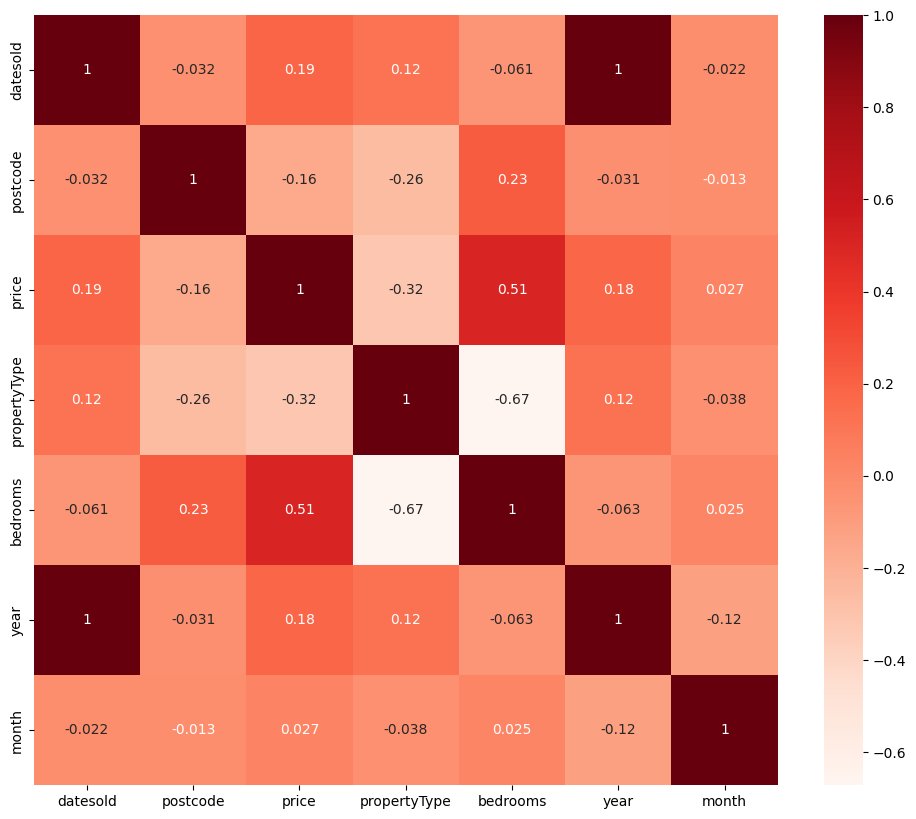

In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
x = data.drop("price", axis=1)
y = data['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20,  shuffle=False)

# LSTM

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()

	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	agg = pd.concat(cols, axis=1)
	agg.columns = names
	agg.dropna(inplace=True)

	return agg

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.022293   0.136053        0.0        0.8        0.0   
2   0.004393   0.974522   0.067809        0.0        0.6        0.0   
3   0.006150   0.971338   0.078844        0.0        0.6        0.0   
4   0.006589   0.971338   0.093945        0.0        0.8        0.0   
5   0.009225   0.974522   0.073617        0.0        0.6        0.0   

   var7(t-1)   var1(t)   var2(t)   var3(t)  var4(t)  var5(t)  var6(t)  \
1   0.090909  0.004393  0.974522  0.067809      0.0      0.6      0.0   
2   0.090909  0.006150  0.971338  0.078844      0.0      0.6      0.0   
3   0.181818  0.006589  0.971338  0.093945      0.0      0.8      0.0   
4   0.181818  0.009225  0.974522  0.073617      0.0      0.6      0.0   
5   0.181818  0.012300  0.971338  0.118629      0.0      0.8      0.0   

    var7(t)  
1  0.090909  
2  0.181818  
3  0.181818  
4  0.181818  
5  0.272727  


In [ ]:
values = reframed.values
n_train_months = 8 * 12
train = values[:n_train_months, :]
test = values[n_train_months:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(96, 1, 13) (96,) (29470, 1, 13) (29470,)


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/50
2/2 - 4s - loss: 0.6740 - val_loss: 0.5467 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 1s - loss: 0.6365 - val_loss: 0.5011 - 1s/epoch - 661ms/step
Epoch 3/50
2/2 - 1s - loss: 0.5993 - val_loss: 0.4581 - 1s/epoch - 652ms/step
Epoch 4/50
2/2 - 1s - loss: 0.5621 - val_loss: 0.4173 - 1s/epoch - 650ms/step
Epoch 5/50
2/2 - 1s - loss: 0.5249 - val_loss: 0.3809 - 1s/epoch - 650ms/step
Epoch 6/50
2/2 - 1s - loss: 0.4877 - val_loss: 0.3481 - 1s/epoch - 659ms/step
Epoch 7/50
2/2 - 1s - loss: 0.4509 - val_loss: 0.3194 - 1s/epoch - 651ms/step
Epoch 8/50
2/2 - 1s - loss: 0.4156 - val_loss: 0.2949 - 1s/epoch - 649ms/step
Epoch 9/50
2/2 - 1s - loss: 0.3796 - val_loss: 0.2750 - 807ms/epoch - 404ms/step
Epoch 10/50
2/2 - 1s - loss: 0.3436 - val_loss: 0.2599 - 1s/epoch - 649ms/step
Epoch 11/50
2/2 - 3s - loss: 0.3073 - val_loss: 0.2499 - 3s/epoch - 1s/step
Epoch 12/50
2/2 - 1s - loss: 0.2710 - val_loss: 0.2456 - 822ms/epoch - 411ms/step
Epoch 13/50
2/2 - 1s - loss: 0.2354 - val_loss: 0.2474 - 800m

# Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=3)
ytest=ytest.ravel()
ytrain = ytrain.ravel()
rf_model.fit(xtrain,ytrain)
rf_model.score(xtest,ytest)
rf_pred =rf_model.predict(xtest)
rf_score=rf_model.score(xtest,ytest)
expl_rf = explained_variance_score(rf_pred,ytest)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(ytest, rf_pred))
print('Mean Squared Error:', mean_squared_error(ytest, rf_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, rf_pred)))

Mean Absolute Error: 100882.05634715199
Mean Squared Error: 25470065463.247906
Root Mean Squared Error: 159593.438033172


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished


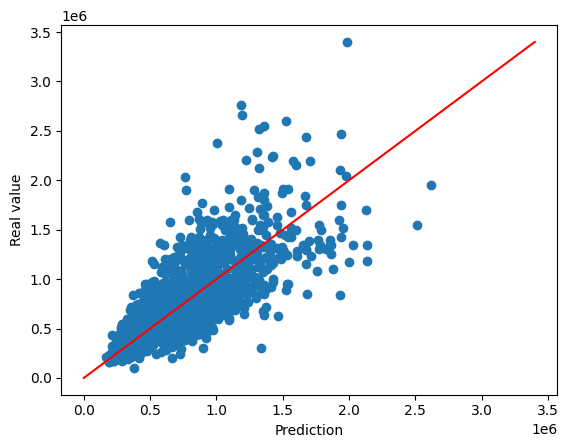

In [ ]:
y_pred = rf_model.predict(xtest)

# Build a plot
plt.scatter(y_pred, ytest)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(ytest), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [ ]:
rf_score

0.6332176777718472

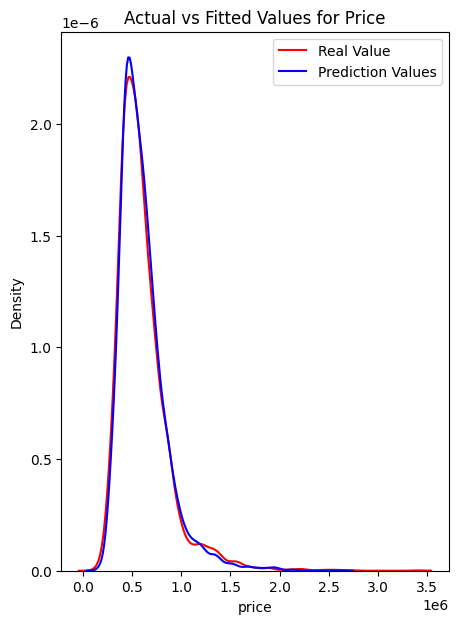

In [ ]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(ytest, color="r", label="Real Value")
sns.kdeplot(rf_pred, color="b", label="Prediction Values" , ax=ax)
plt.title('eal vs Fitted Values for Price')
plt.legend()
plt.show()
plt.close()

In [ ]:
models_score =pd.DataFrame({'Model':['Random forest Regression'],
                            'Score':[rf_score],
                            'Explained Variance Score':[expl_rf]
                           })
models_score

,Model,Score,Explained Variance Score
0,Random forest Regression,0.629781,0.555968
